# tutorial 04

## partial-sky ABS pipeline with noise

In [1]:
import numpy as np
import healpy as hp
import matplotlib
import abspy as ap
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### read in maps

In [2]:
NSIDE = 128

map30 = hp.read_map('./data/TQU_30GHz_r7.fits',field=[0,1,2],dtype=np.float64,verbose=0)
map95 = hp.read_map('./data/TQU_95GHz_r7.fits',field=[0,1,2],dtype=np.float64,verbose=0)
map150 = hp.read_map('./data/TQU_150GHz_r7.fits',field=[0,1,2],dtype=np.float64,verbose=0)
map353 = hp.read_map('./data/TQU_353GHz_r7.fits',field=[0,1,2],dtype=np.float64,verbose=0)
mapcmb = hp.read_map('./data/TQU_CMB_r7.fits',field=[0,1,2],dtype=np.float64,verbose=0)

vmap30 = hp.read_map('./data/TQU_var_30GHz_r7.fits',field=[0,1,2],dtype=np.float64,verbose=0)
vmap95 = hp.read_map('./data/TQU_var_95GHz_r7.fits',field=[0,1,2],dtype=np.float64,verbose=0)
vmap150 = hp.read_map('./data/TQU_var_150GHz_r7.fits',field=[0,1,2],dtype=np.float64,verbose=0)
vmap353 = hp.read_map('./data/TQU_var_353GHz_r7.fits',field=[0,1,2],dtype=np.float64,verbose=0)

print (map95.shape, map95.dtype)

(3, 196608) float64


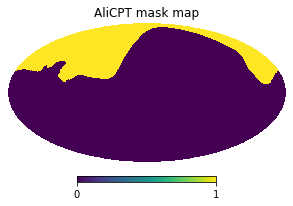

In [3]:
mask = hp.read_map('./data/ali_mask_r7.fits',dtype=bool,verbose=False)

fig = matplotlib.pyplot.figure(figsize=(5,5))
gs = matplotlib.gridspec.GridSpec(5, 5)
fig.add_subplot(gs[0:5, 0:5])
hp.mollview(mask,title='AliCPT mask map',hold=True)

### simulate noise from variance maps and re-estimate $C_\ell^{noise}$, $\sigma_\ell^{noise}$

- generate a set of ''observables''

In [4]:
NPIX = 12*NSIDE**2

def noise_30():
    _tmp = np.zeros((3,NPIX))
    for i in range(NPIX):
        if mask[i]:
            _tmp[0,i] = np.random.normal(0,np.sqrt(vmap30[0,i]))
            _tmp[1,i] = np.random.normal(0,np.sqrt(vmap30[0,i]))
            _tmp[2,i] = np.random.normal(0,np.sqrt(vmap30[0,i]))
    return _tmp

def noise_95():
    _tmp = np.zeros((3,NPIX))
    for i in range(NPIX):
        if mask[i]:
            _tmp[0,i] = np.random.normal(0,np.sqrt(vmap95[0,i]))
            _tmp[1,i] = np.random.normal(0,np.sqrt(vmap95[0,i]))
            _tmp[2,i] = np.random.normal(0,np.sqrt(vmap95[0,i]))
    return _tmp

def noise_150():
    _tmp = np.zeros((3,NPIX))
    for i in range(NPIX):
        if mask[i]:
            _tmp[0,i] = np.random.normal(0,np.sqrt(vmap150[0,i]))
            _tmp[1,i] = np.random.normal(0,np.sqrt(vmap150[0,i]))
            _tmp[2,i] = np.random.normal(0,np.sqrt(vmap150[0,i]))
    return _tmp

def noise_353():
    _tmp = np.zeros((3,NPIX))
    for i in range(NPIX):
        if mask[i]:
            _tmp[0,i] = np.random.normal(0,np.sqrt(vmap353[0,i]))
            _tmp[1,i] = np.random.normal(0,np.sqrt(vmap353[0,i]))
            _tmp[2,i] = np.random.normal(0,np.sqrt(vmap353[0,i]))
    return _tmp

map30 += noise_30()
map95 += noise_95()
map150 += noise_150()
map353 += noise_353()

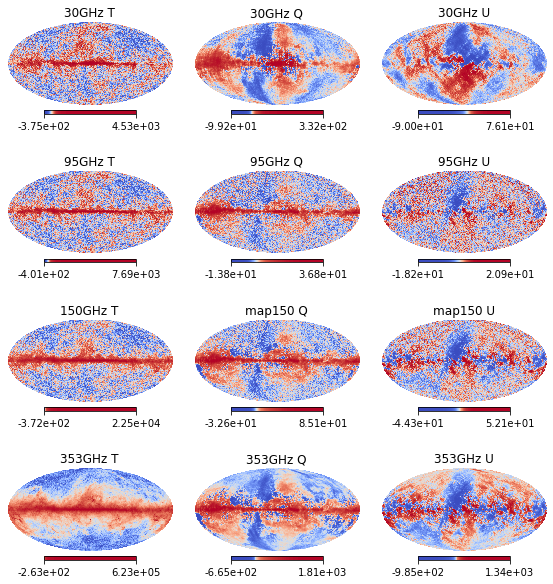

In [5]:
fig = matplotlib.pyplot.figure(figsize=(10,10))
gs = matplotlib.gridspec.GridSpec(55, 30)

fig.add_subplot(gs[0:10, 0:10])
hp.mollview(map30[0],format='%.2e',
            norm='hist',cmap='coolwarm',hold=True,title='30GHz T',cbar=1)
fig.add_subplot(gs[0:10, 10:20])
hp.mollview(map30[1],format='%.2e',
            norm='hist',cmap='coolwarm',hold=True,title='30GHz Q',cbar=1)
fig.add_subplot(gs[0:10, 20:30])
hp.mollview(map30[2],format='%.2e',
            norm='hist',cmap='coolwarm',hold=True,title='30GHz U',cbar=1)

fig.add_subplot(gs[15:25, 0:10])
hp.mollview(map95[0],format='%.2e',
            norm='hist',cmap='coolwarm',hold=True,title='95GHz T',cbar=1)
fig.add_subplot(gs[15:25, 10:20])
hp.mollview(map95[1],format='%.2e',
            norm='hist',cmap='coolwarm',hold=True,title='95GHz Q',cbar=1)
fig.add_subplot(gs[15:25, 20:30])
hp.mollview(map95[2],format='%.2e',
            norm='hist',cmap='coolwarm',hold=True,title='95GHz U',cbar=1)

fig.add_subplot(gs[30:40, 0:10])
hp.mollview(map150[0],format='%.2e',
            norm='hist',cmap='coolwarm',hold=True,title='150GHz T',cbar=1)
fig.add_subplot(gs[30:40, 10:20])
hp.mollview(map150[1],format='%.2e',
            norm='hist',cmap='coolwarm',hold=True,title='map150 Q',cbar=1)
fig.add_subplot(gs[30:40, 20:30])
hp.mollview(map150[2],format='%.2e',
            norm='hist',cmap='coolwarm',hold=True,title='map150 U',cbar=1)

fig.add_subplot(gs[45:55, 0:10])
hp.mollview(map353[0],format='%.2e',
            norm='hist',cmap='coolwarm',hold=True,title='353GHz T',cbar=1)
fig.add_subplot(gs[45:55, 10:20])
hp.mollview(map353[1],format='%.2e',
            norm='hist',cmap='coolwarm',hold=True,title='353GHz Q',cbar=1)
fig.add_subplot(gs[45:55, 20:30])
hp.mollview(map353[2],format='%.2e',
            norm='hist',cmap='coolwarm',hold=True,title='353GHz U',cbar=1)

- estimate cross PS

In [6]:
BINNING = 10
est = ap.pstimator()

In [7]:
auto_cmb = est.auto_teb(mapcmb, mask, aposcale=1.0, binning=BINNING)

In [8]:
auto_30 = est.auto_teb(map30, mask, aposcale=1.0, binning=BINNING)
auto_95 = est.auto_teb(map95, mask, aposcale=1.0, binning=BINNING)
auto_150 = est.auto_teb(map150, mask, aposcale=1.0, binning=BINNING)
auto_353 = est.auto_teb(map353, mask, aposcale=1.0, binning=BINNING)

cross_30_95 = est.cross_teb(np.vstack([map30,map95]), mask, aposcale=1.0, binning=BINNING)
cross_30_150 = est.cross_teb(np.vstack([map30,map150]), mask, aposcale=1.0, binning=BINNING)
cross_30_353 = est.cross_teb(np.vstack([map30,map353]), mask, aposcale=1.0, binning=BINNING)

cross_95_150 = est.cross_teb(np.vstack([map95,map150]), mask, aposcale=1.0, binning=BINNING)
cross_95_353 = est.cross_teb(np.vstack([map95,map353]), mask, aposcale=1.0, binning=BINNING)

cross_150_353 = est.cross_teb(np.vstack([map150,map353]), mask, aposcale=1.0, binning=BINNING)

In [9]:
Nfreq = 4  # 30,95,150,353
Llist = list(auto_cmb[0])
Nell = len(Llist)

tt_total = np.zeros((Nell,Nfreq,Nfreq))
ee_total = np.zeros((Nell,Nfreq,Nfreq))
bb_total = np.zeros((Nell,Nfreq,Nfreq))

for i in range(Nell):
    # diagnoal
    tt_total[i,0,0] = auto_30[1][i]
    tt_total[i,1,1] = auto_95[1][i]
    tt_total[i,2,2] = auto_150[1][i]
    tt_total[i,3,3] = auto_353[1][i]
    
    ee_total[i,0,0] = auto_30[2][i]
    ee_total[i,1,1] = auto_95[2][i]
    ee_total[i,2,2] = auto_150[2][i]
    ee_total[i,3,3] = auto_353[2][i]
    
    bb_total[i,0,0] = auto_30[3][i]
    bb_total[i,1,1] = auto_95[3][i]
    bb_total[i,2,2] = auto_150[3][i]
    bb_total[i,3,3] = auto_353[3][i]
    # cross
    tt_total[i,0,1] = cross_30_95[1][i]
    tt_total[i,0,2] = cross_30_150[1][i]
    tt_total[i,0,3] = cross_30_353[1][i]
    tt_total[i,1,2] = cross_95_150[1][i]
    tt_total[i,1,3] = cross_95_353[1][i]
    tt_total[i,2,3] = cross_150_353[1][i]
    tt_total[i,1,0] = tt_total[i,0,1]
    tt_total[i,2,0] = tt_total[i,0,2]
    tt_total[i,3,0] = tt_total[i,0,3]
    tt_total[i,2,1] = tt_total[i,1,2]
    tt_total[i,3,1] = tt_total[i,1,3]
    tt_total[i,3,2] = tt_total[i,2,3]
    
    ee_total[i,0,1] = cross_30_95[2][i]
    ee_total[i,0,2] = cross_30_150[2][i]
    ee_total[i,0,3] = cross_30_353[2][i]
    ee_total[i,1,2] = cross_95_150[2][i]
    ee_total[i,1,3] = cross_95_353[2][i]
    ee_total[i,2,3] = cross_150_353[2][i]
    ee_total[i,1,0] = ee_total[i,0,1]
    ee_total[i,2,0] = ee_total[i,0,2]
    ee_total[i,3,0] = ee_total[i,0,3]
    ee_total[i,2,1] = ee_total[i,1,2]
    ee_total[i,3,1] = ee_total[i,1,3]
    ee_total[i,3,2] = ee_total[i,2,3]
    
    bb_total[i,0,1] = cross_30_95[3][i]
    bb_total[i,0,2] = cross_30_150[3][i]
    bb_total[i,0,3] = cross_30_353[3][i]
    bb_total[i,1,2] = cross_95_150[3][i]
    bb_total[i,1,3] = cross_95_353[3][i]
    bb_total[i,2,3] = cross_150_353[3][i]
    bb_total[i,1,0] = bb_total[i,0,1]
    bb_total[i,2,0] = bb_total[i,0,2]
    bb_total[i,3,0] = bb_total[i,0,3]
    bb_total[i,2,1] = bb_total[i,1,2]
    bb_total[i,3,1] = bb_total[i,1,3]
    bb_total[i,3,2] = bb_total[i,2,3]

- Gaussian noise resampling

In [10]:
RESAMP = 2  # size of resampling

n30 = np.zeros((3,NPIX,RESAMP))
n95 = np.zeros((3,NPIX,RESAMP))
n150 = np.zeros((3,NPIX,RESAMP))
n353 = np.zeros((3,NPIX,RESAMP))

for i in range(NPIX):
    if mask[i]:
        n30[0,i,:] = np.random.normal(0,np.sqrt(vmap30[0,i]),RESAMP)
        n30[1,i,:] = np.random.normal(0,np.sqrt(vmap30[1,i]),RESAMP)
        n30[2,i,:] = np.random.normal(0,np.sqrt(vmap30[2,i]),RESAMP)
    
        n95[0,i,:] = np.random.normal(0,np.sqrt(vmap95[0,i]),RESAMP)
        n95[1,i,:] = np.random.normal(0,np.sqrt(vmap95[1,i]),RESAMP)
        n95[2,i,:] = np.random.normal(0,np.sqrt(vmap95[2,i]),RESAMP)
    
        n150[0,i,:] = np.random.normal(0,np.sqrt(vmap150[0,i]),RESAMP)
        n150[1,i,:] = np.random.normal(0,np.sqrt(vmap150[1,i]),RESAMP)
        n150[2,i,:] = np.random.normal(0,np.sqrt(vmap150[2,i]),RESAMP)
    
        n353[0,i,:] = np.random.normal(0,np.sqrt(vmap353[0,i]),RESAMP)
        n353[1,i,:] = np.random.normal(0,np.sqrt(vmap353[1,i]),RESAMP)
        n353[2,i,:] = np.random.normal(0,np.sqrt(vmap353[2,i]),RESAMP)

- estimate $C_\ell^{noise}$, $\sigma_\ell^{noise}$

In [11]:
auto_n30 = np.zeros((3,Nell))
sigma_n30 = np.zeros((3,Nell))
auto_n95 = np.zeros((3,Nell))
sigma_n95 = np.zeros((3,Nell))
auto_n150 = np.zeros((3,Nell))
sigma_n150 = np.zeros((3,Nell))
auto_n353 = np.zeros((3,Nell))
sigma_n353 = np.zeros((3,Nell))
cross_n3095 = np.zeros((3,Nell))
cross_n30150 = np.zeros((3,Nell))
cross_n30353 = np.zeros((3,Nell))
cross_n95150 = np.zeros((3,Nell))
cross_n95353 = np.zeros((3,Nell))
cross_n150353 = np.zeros((3,Nell))

for i in range(RESAMP):
    _tmp = est.auto_teb(n30[:,:,i], mask, aposcale=1.0, binning=BINNING)
    auto_n30 += _tmp[1:]
    sigma_n30 += np.array(_tmp[1:])*np.array(_tmp[1:])
    
    _tmp = est.auto_teb(n95[:,:,i], mask, aposcale=1.0, binning=BINNING)
    auto_n95 += _tmp[1:]
    sigma_n95 += np.array(_tmp[1:])*np.array(_tmp[1:])
    
    _tmp = est.auto_teb(n150[:,:,i], mask, aposcale=1.0, binning=BINNING)
    auto_n150 += _tmp[1:]
    sigma_n150 += np.array(_tmp[1:])*np.array(_tmp[1:])
    
    _tmp = est.auto_teb(n353[:,:,i], mask, aposcale=1.0, binning=BINNING)
    auto_n353 += _tmp[1:]
    sigma_n353 += np.array(_tmp[1:])*np.array(_tmp[1:])
    
    _tmp = est.cross_teb(np.vstack([n30[:,:,i],n95[:,:,i]]), mask, aposcale=1.0, binning=BINNING)
    cross_n3095 += _tmp[1:]
    
    _tmp = est.cross_teb(np.vstack([n30[:,:,i],n150[:,:,i]]), mask, aposcale=1.0, binning=BINNING)
    cross_n30150 += _tmp[1:]
    
    _tmp = est.cross_teb(np.vstack([n30[:,:,i],n353[:,:,i]]), mask, aposcale=1.0, binning=BINNING)
    cross_n30353 += _tmp[1:]
    
    _tmp = est.cross_teb(np.vstack([n95[:,:,i],n150[:,:,i]]), mask, aposcale=1.0, binning=BINNING)
    cross_n95150 += _tmp[1:]
    
    _tmp = est.cross_teb(np.vstack([n95[:,:,i],n353[:,:,i]]), mask, aposcale=1.0, binning=BINNING)
    cross_n95353 += _tmp[1:]
    
    _tmp = est.cross_teb(np.vstack([n150[:,:,i],n353[:,:,i]]), mask, aposcale=1.0, binning=BINNING)
    cross_n150353 += _tmp[1:]
#
auto_n30 /= RESAMP
sigma_n30 = np.sqrt(sigma_n30/RESAMP - auto_n30**2)
auto_n95 /= RESAMP
sigma_n95 = np.sqrt(sigma_n95/RESAMP - auto_n95**2)
auto_n150 /= RESAMP
sigma_n150 = np.sqrt(sigma_n150/RESAMP - auto_n150**2) 
auto_n353 /= RESAMP
sigma_n353 = np.sqrt(sigma_n353/RESAMP - auto_n353**2)  
cross_n3095 /= RESAMP 
cross_n30150 /= RESAMP
cross_n30353 /= RESAMP
cross_n95150 /= RESAMP
cross_n95353 /= RESAMP
cross_n150353 /= RESAMP

In [12]:
tt_noise = np.zeros((Nell,Nfreq,Nfreq))
ee_noise = np.zeros((Nell,Nfreq,Nfreq))
bb_noise = np.zeros((Nell,Nfreq,Nfreq))
tt_sigma = np.zeros((Nell,Nfreq))
ee_sigma = np.zeros((Nell,Nfreq))
bb_sigma = np.zeros((Nell,Nfreq))

for i in range(Nell):
    # diagnoal
    tt_noise[i,0,0] = auto_n30[0][i]
    tt_noise[i,1,1] = auto_n95[0][i]
    tt_noise[i,2,2] = auto_n150[0][i]
    tt_noise[i,3,3] = auto_n353[0][i]
    
    tt_sigma[i,0] = sigma_n30[0][i]
    tt_sigma[i,1] = sigma_n95[0][i]
    tt_sigma[i,2] = sigma_n150[0][i]
    tt_sigma[i,3] = sigma_n353[0][i]
    
    ee_noise[i,0,0] = auto_n30[1][i]
    ee_noise[i,1,1] = auto_n95[1][i]
    ee_noise[i,2,2] = auto_n150[1][i]
    ee_noise[i,3,3] = auto_n353[1][i]
    
    ee_sigma[i,0] = sigma_n30[1][i]
    ee_sigma[i,1] = sigma_n95[1][i]
    ee_sigma[i,2] = sigma_n150[1][i]
    ee_sigma[i,3] = sigma_n353[1][i]
    
    bb_noise[i,0,0] = auto_n30[2][i]
    bb_noise[i,1,1] = auto_n95[2][i]
    bb_noise[i,2,2] = auto_n150[2][i]
    bb_noise[i,3,3] = auto_n353[2][i]
    
    bb_sigma[i,0] = sigma_n30[2][i]
    bb_sigma[i,1] = sigma_n95[2][i]
    bb_sigma[i,2] = sigma_n150[2][i]
    bb_sigma[i,3] = sigma_n353[2][i]
    # cross
    tt_noise[i,0,1] = cross_n3095[0][i]
    tt_noise[i,0,2] = cross_n30150[0][i]
    tt_noise[i,0,3] = cross_n30353[0][i]
    tt_noise[i,1,2] = cross_n95150[0][i]
    tt_noise[i,1,3] = cross_n95353[0][i]
    tt_noise[i,2,3] = cross_n150353[0][i]
    tt_noise[i,1,0] = tt_noise[i,0,1]
    tt_noise[i,2,0] = tt_noise[i,0,2]
    tt_noise[i,3,0] = tt_noise[i,0,3]
    tt_noise[i,2,1] = tt_noise[i,1,2]
    tt_noise[i,3,1] = tt_noise[i,1,3]
    tt_noise[i,3,2] = tt_noise[i,2,3]
    
    ee_noise[i,0,1] = cross_n3095[1][i]
    ee_noise[i,0,2] = cross_n30150[1][i]
    ee_noise[i,0,3] = cross_n30353[1][i]
    ee_noise[i,1,2] = cross_n95150[1][i]
    ee_noise[i,1,3] = cross_n95353[1][i]
    ee_noise[i,2,3] = cross_n150353[1][i]
    ee_noise[i,1,0] = ee_noise[i,0,1]
    ee_noise[i,2,0] = ee_noise[i,0,2]
    ee_noise[i,3,0] = ee_noise[i,0,3]
    ee_noise[i,2,1] = ee_noise[i,1,2]
    ee_noise[i,3,1] = ee_noise[i,1,3]
    ee_noise[i,3,2] = ee_noise[i,2,3]
    
    bb_noise[i,0,1] = cross_n3095[2][i]
    bb_noise[i,0,2] = cross_n30150[2][i]
    bb_noise[i,0,3] = cross_n30353[2][i]
    bb_noise[i,1,2] = cross_n95150[2][i]
    bb_noise[i,1,3] = cross_n95353[2][i]
    bb_noise[i,2,3] = cross_n150353[2][i]
    bb_noise[i,1,0] = bb_noise[i,0,1]
    bb_noise[i,2,0] = bb_noise[i,0,2]
    bb_noise[i,3,0] = bb_noise[i,0,3]
    bb_noise[i,2,1] = bb_noise[i,1,2]
    bb_noise[i,3,1] = bb_noise[i,1,3]
    bb_noise[i,3,2] = bb_noise[i,2,3]

### call the `abssep`

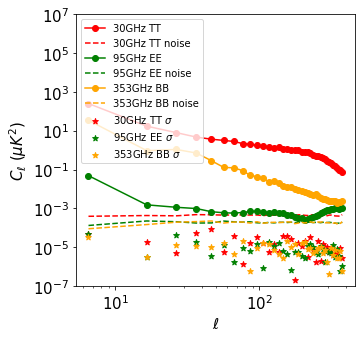

In [13]:
fig,ax = matplotlib.pyplot.subplots(figsize=(5,5))

ax.plot(Llist,tt_total[:,0,0],
       color='red',marker='o',label='30GHz TT')
ax.plot(Llist,tt_noise[:,0,0],
        color='red',linestyle='--',label='30GHz TT noise')
ax.scatter(Llist,tt_sigma[:,0],
          color='red',marker='*',label='30GHz TT $\sigma$')

ax.plot(Llist,ee_total[:,1,1],
       color='green',marker='o',label='95GHz EE')
ax.plot(Llist,ee_noise[:,1,1],
        color='green',linestyle='--',label='95GHz EE noise')
ax.scatter(Llist,ee_sigma[:,1],
          color='green',marker='*',label='95GHz EE $\sigma$')

ax.plot(Llist,bb_total[:,3,3],
       color='orange',marker='o',label='353GHz BB')
ax.plot(Llist,bb_noise[:,3,3],
        color='orange',linestyle='--',label='353GHz BB noise')
ax.scatter(Llist,bb_sigma[:,2],
          color='orange',marker='*',label='353GHz BB $\sigma$')

ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(loc=2)
ax.set_xlabel(r'$\ell$',fontsize=15)
ax.set_ylabel(r'$C_\ell$ ($\mu K^2$)',fontsize=15)
ax.tick_params(axis='both', labelsize=15)
ax.set_ylim((1.e-7,1.e7))
ax.set_yscale('log')
ax.set_xscale('log')

In [14]:
#tt_noise = np.zeros_like(tt_noise)
#ee_noise = np.zeros_like(ee_noise)
#bb_noise = np.zeros_like(bb_noise)

#tt_sigma = np.ones_like(tt_sigma)*1.e-5
#ee_sigma = np.ones_like(ee_sigma)*1.e-5
#bb_sigma = np.ones_like(bb_sigma)*1.e-5

In [29]:
#separator = ap.abssep(tt_total,tt_noise,tt_sigma,modes=Llist,bins=10,shift=10.,threshold=1.)
#rslt_tt = separator()
#separator = ap.abssep(ee_total,ee_noise,ee_sigma,modes=Llist,bins=10,shift=30.,threshold=1.)
#rslt_ee = separator()
#separator = ap.abssep(bb_total,bb_noise,bb_sigma,modes=Llist,bins=10,shift=30.,threshold=1.)
#rslt_bb = separator()

In [30]:
separator = ap.abssep(tt_total-tt_noise,modes=Llist,bins=10,shift=10.,threshold=1.)
rslt_tt = separator()
separator = ap.abssep(ee_total-tt_noise,modes=Llist,bins=10,shift=30.,threshold=1.)
rslt_ee = separator()
separator = ap.abssep(bb_total-tt_noise,modes=Llist,bins=10,shift=30.,threshold=1.)
rslt_bb = separator()

(1, 384)

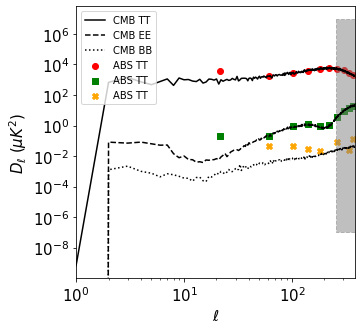

In [31]:
fig,ax = matplotlib.pyplot.subplots(figsize=(5,5))

ax.scatter(rslt_tt[0],rslt_tt[1],
           color='red',marker='o',label=r'ABS TT')
ax.scatter(rslt_ee[0],rslt_ee[1],
           color='green',marker='s',label=r'ABS TT')
ax.scatter(rslt_bb[0],rslt_bb[1],
           color='orange',marker='X',label=r'ABS TT')

cmb_cl = hp.anafast(mapcmb)
ell = np.arange(cmb_cl.shape[1])
ax.plot((0.5/np.pi)*ell*(ell+1)*cmb_cl[0],
        color='black',linestyle='-',label=r'CMB TT')
ax.plot((0.5/np.pi)*ell*(ell+1)*cmb_cl[1],
        color='black',linestyle='--',label=r'CMB EE')
ax.plot((0.5/np.pi)*ell*(ell+1)*cmb_cl[2],
        color='black',linestyle=':',label=r'CMB BB')

ax.fill_between((2*NSIDE,3*NSIDE),(1e-7,1e-7),(1e7,1e7),
                color='gray',linestyle='--',alpha=0.5)

ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(loc=2)
ax.set_xlabel(r'$\ell$',fontsize=15)
ax.set_ylabel(r'$D_\ell$ ($\mu K^2$)',fontsize=15)
ax.tick_params(axis='both', labelsize=15)
#ax.set_ylim((1.e-7,1.e7))
ax.set_xlim((1,3*NSIDE))

end